In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

results_path = '../src_results/9.csv'

if not os.path.exists(results_path):
    print(f"Error: {results_path} not found.")
    exit()

df = pd.read_csv(results_path)

df['Time_ms'] = df['Time'] * 1000


base_times = df[(df['Strategy'] == 'Outer') & (df['Threads'] == 1)][['Size', 'Time']]
base_times = base_times.rename(columns={'Time': 'BaseTime'})

df = pd.merge(df, base_times, on='Size', how='left')

# Считаем метрики
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

sizes = sorted(df['Size'].unique())
strategies = ['Outer', 'Inner', 'Nested']
colors = {'Outer': 'tab:blue', 'Inner': 'tab:red', 'Nested': 'tab:green'}

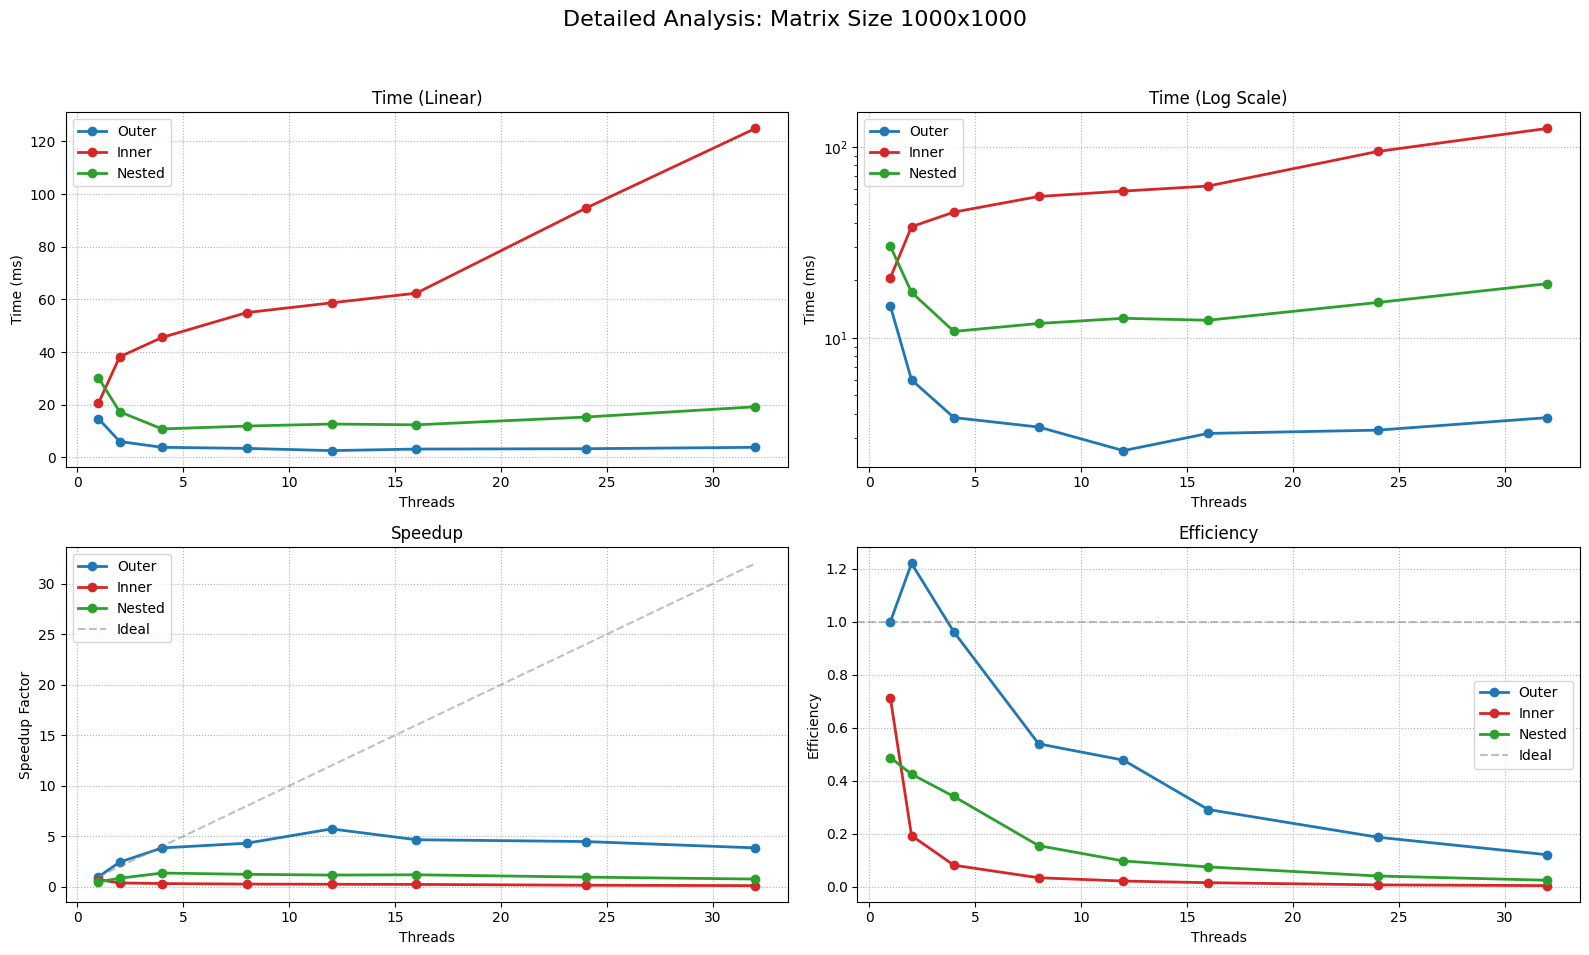

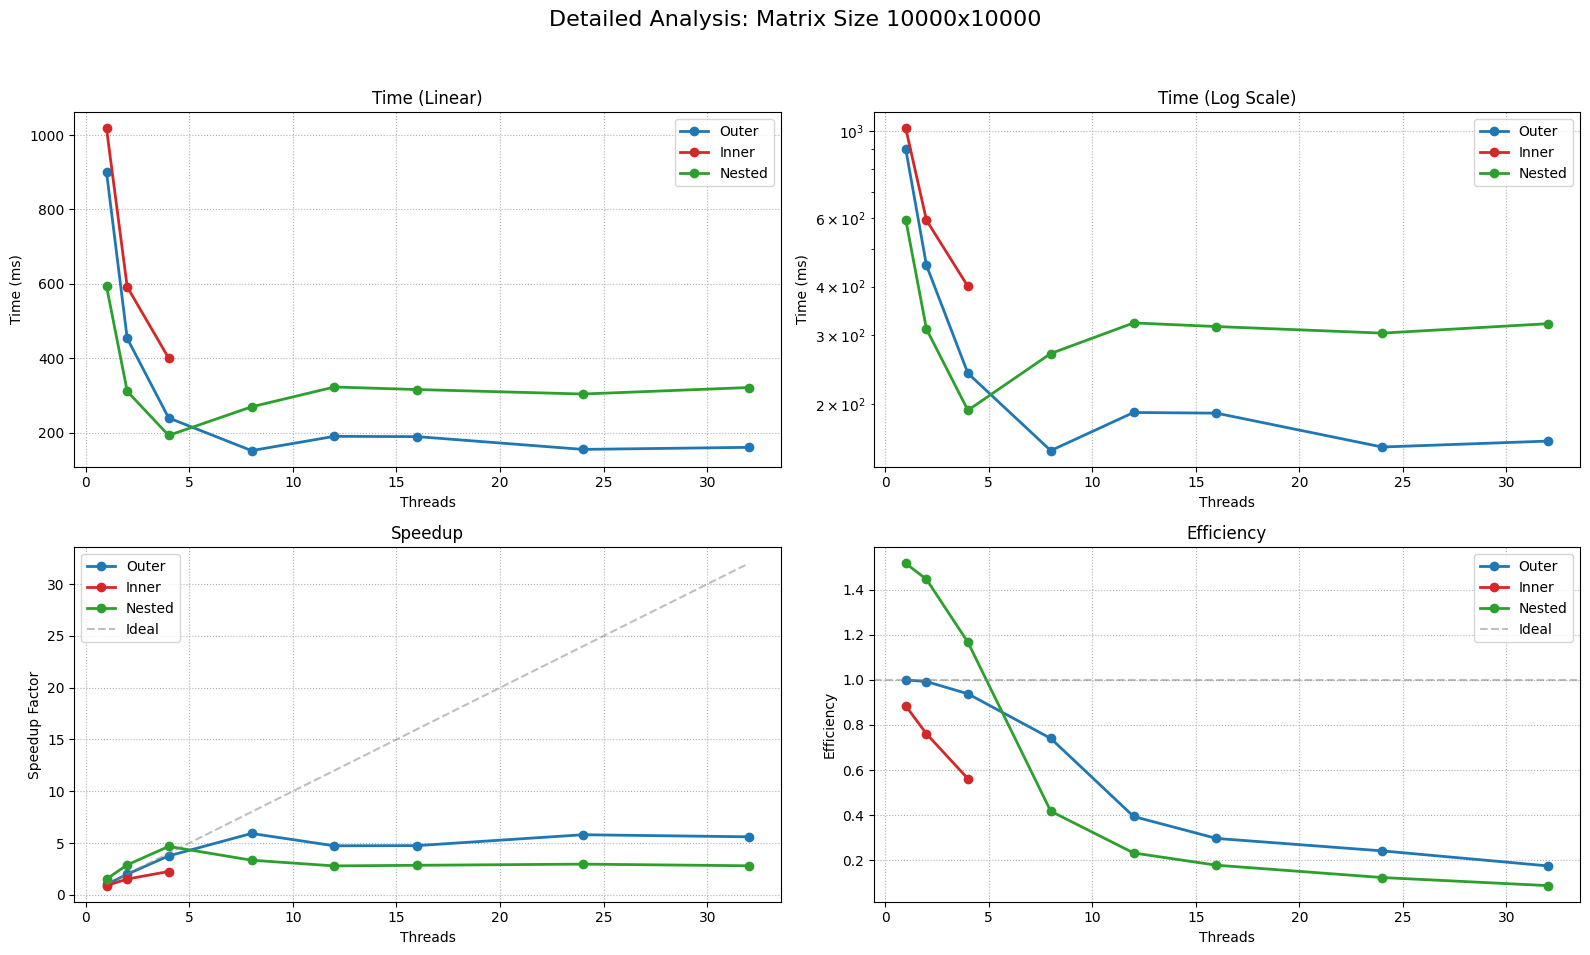

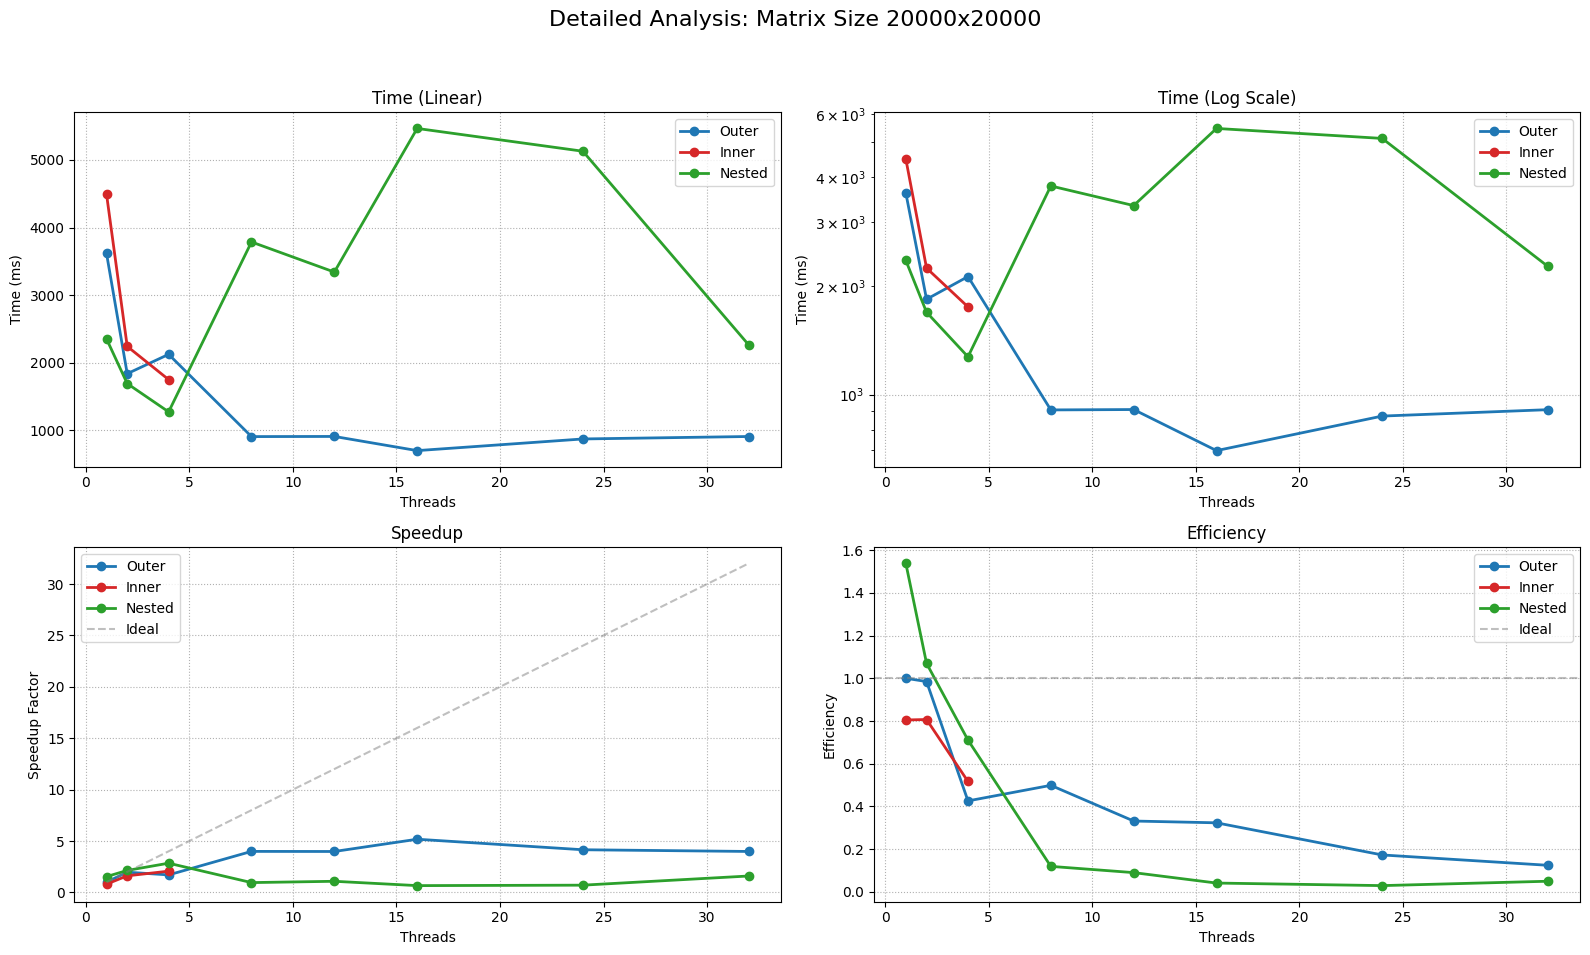

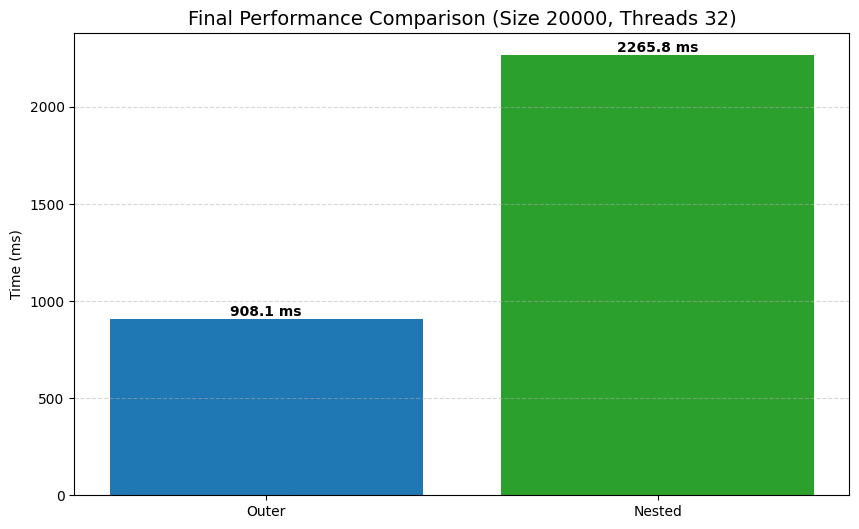

In [8]:
plt.style.use('default')

for s in sizes:
    subset = df[df['Size'] == s]
    if subset.empty: continue

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Detailed Analysis: Matrix Size {s}x{s}', fontsize=16)

    ax_time = axes[0, 0]
    for strat in strategies:
        data = subset[subset['Strategy'] == strat].sort_values('Threads')
        if data.empty: continue
        ax_time.plot(data['Threads'], data['Time_ms'], marker='o', label=strat, color=colors[strat], linewidth=2)
    
    ax_time.set_title('Time (Linear)')
    ax_time.set_ylabel('Time (ms)')
    ax_time.set_xlabel('Threads')
    ax_time.grid(True, linestyle=':')
    ax_time.legend()

    ax_log = axes[0, 1]
    for strat in strategies:
        data = subset[subset['Strategy'] == strat].sort_values('Threads')
        if data.empty: continue
        ax_log.plot(data['Threads'], data['Time_ms'], marker='o', label=strat, color=colors[strat], linewidth=2)
    
    ax_log.set_title('Time (Log Scale)')
    ax_log.set_yscale('log')
    ax_log.set_ylabel('Time (ms)')
    ax_log.set_xlabel('Threads')
    ax_log.grid(True, linestyle=':')
    ax_log.legend()

    ax_speed = axes[1, 0]
    for strat in strategies:
        data = subset[subset['Strategy'] == strat].sort_values('Threads')
        if data.empty: continue
        ax_speed.plot(data['Threads'], data['Speedup'], marker='o', label=strat, color=colors[strat], linewidth=2)
    
    max_th = subset['Threads'].max()
    ax_speed.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal')
    
    ax_speed.set_title('Speedup')
    ax_speed.set_ylabel('Speedup Factor')
    ax_speed.set_xlabel('Threads')
    ax_speed.grid(True, linestyle=':')
    ax_speed.legend()

    ax_eff = axes[1, 1]
    for strat in strategies:
        data = subset[subset['Strategy'] == strat].sort_values('Threads')
        if data.empty: continue
        ax_eff.plot(data['Threads'], data['Efficiency'], marker='o', label=strat, color=colors[strat], linewidth=2)
    
    ax_eff.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')
    ax_eff.set_title('Efficiency')
    ax_eff.set_ylabel('Efficiency')
    ax_eff.set_xlabel('Threads')
    ax_eff.grid(True, linestyle=':')
    ax_eff.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

max_size = sizes[-1]
subset_max = df[df['Size'] == max_size]
max_threads = subset_max['Threads'].max()

final_data = subset_max[subset_max['Threads'] == max_threads]

plt.figure(figsize=(10, 6))
bars = plt.bar(final_data['Strategy'], final_data['Time_ms'], color=[colors[s] for s in final_data['Strategy']])
plt.title(f'Final Performance Comparison (Size {max_size}, Threads {max_threads})', fontsize=14)
plt.ylabel('Time (ms)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} ms',
             ha='center', va='bottom', fontweight='bold')

plt.show()